In [1]:
import os

from __future__ import annotations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

from utils.configure_results import configure_output_path
from utils.calculation import sample_scale_free_degrees, theoretical_scale_free_distribution

from tqdm import tqdm

# グラフの色指定
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
markers = ["o", "^", "s", "D", "P", "X", "d", "H", "v", "p", "*"]
linestyles = ["-", "--", "-.", ":", "-", "--", "-.", ":", "-", "--", "-.", ":"]

# グラフ全体のフォント設定
# plt.rcParams['font.family'] = 'serif'  # 全体のフォントをSerifに設定
# plt.rcParams['mathtext.fontset'] = 'cm'  # 数式のフォントをComputer Modernに設定
# plt.rcParams['mathtext.rm'] = 'serif'  # TeXの通常フォントをSerifに設定
# plt.rcParams['font.size'] = 18  # デフォルトフォントサイズ
# plt.rcParams['axes.labelsize'] = 18  # 軸ラベルのフォントサイズ
# plt.rcParams['axes.titlesize'] = 22  # タイトルのフォントサイズ
# plt.rcParams['legend.fontsize'] = 16  # 凡例のフォントサイズ
# plt.rcParams['grid.color'] = 'gray'  # グリッドの色を薄い灰色に設定
# plt.rcParams['grid.linestyle'] = ':'  # グリッドを点線に設定
# plt.rcParams['grid.linewidth'] = 0.5  # グリッドの線幅を設定

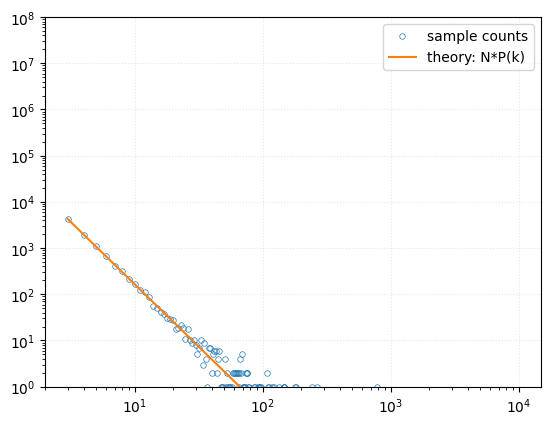

sample
 --> k_min: 3
 --> k_max: 778
 --> mean: 6.1071
theory
 --> mean: 6.182845972469514


In [2]:
N = 10000 # 頂点数
pow_k_min = 3
pow_gamma = 2.7

n_sample = N # サンプル数

k_vals = np.arange(pow_k_min, N)
sample_k_ave, sample_counts = sample_scale_free_degrees(n_sample, pow_k_min, N-1, pow_gamma)
theory_k_ave, theory_pk = theoretical_scale_free_distribution(pow_k_min, N-1, pow_gamma)

plt.figure()
plt.ylim(1e0, 1e8)
plt.loglog(k_vals, sample_counts, linestyle="", marker="o", markerfacecolor="none", color=colors[0], markersize=4, markeredgewidth=0.5, label="sample counts")
plt.loglog(k_vals, N * theory_pk, linestyle="-", color=colors[1], label="theory: N*P(k)")
plt.grid(True, alpha=0.3, linestyle=":")
plt.legend()
plt.show()

print("sample")
print(" --> k_min:", pow_k_min)
print(" --> k_max:", k_vals[sample_counts > 0].max())
print(" --> mean:", sample_k_ave)

print("theory")
print(" --> mean:", theory_k_ave)


In [20]:
pi_type = "Poi"
output_dir = os.path.abspath(os.path.join("..", "out", "ebcm", "directed-infty", pi_type))
g = pd.read_csv(os.path.join(output_dir, "gd_zero.csv"))
g = g.set_index(["T", "rho0", "lambda_d", "mu"]).to_xarray()
rho0_values = g["rho0"].values
lambda_d_values = g["lambda_d"].values
theta_d_infty = g["theta_d"].squeeze()


In [4]:
gdp = pd.read_csv(os.path.join(output_dir, "gdp_zero.csv"))
gdp_x = np.zeros(len(rho0_values), dtype=np.ndarray)
gdp_y = np.zeros(len(rho0_values), dtype=np.ndarray)

gdpp = pd.read_csv(os.path.join(output_dir, "gdpp_zero.csv"))
gdpp_x = np.zeros(len(rho0_values), dtype=np.ndarray)
gdpp_y = np.zeros(len(rho0_values), dtype=np.ndarray)

gd_gdp = pd.read_csv(os.path.join(output_dir, "gd_gdp_zero.csv"))
gd_gdp_x = np.zeros(len(rho0_values), dtype=np.ndarray)
gd_gdp_y = np.zeros(len(rho0_values), dtype=np.ndarray)

gd_gdp_gdpp = pd.read_csv(os.path.join(output_dir, "gd_gdp_gdpp_zero.csv"))

for rho0_idx, rho0 in enumerate(tqdm(rho0_values)):
    x1 = []
    y1 = []

    x2 = []
    y2 = []

    x3 = []
    y3 = []

    arr_gdp = gdp[gdp["rho0"] == rho0]
    arr_gdpp = gdpp[gdpp["rho0"] == rho0]
    arr_gd_gdp = gd_gdp[gd_gdp["rho0"] == rho0]

    for lambda_d_idx, lambda_d in enumerate(lambda_d_values):
        points_gdp = arr_gdp[arr_gdp["lambda_d"] == lambda_d]
        points_gdp = points_gdp["theta_d"].values
        for point in points_gdp:
            x1.append(lambda_d)
            y1.append(point)

        points_gdpp = arr_gdpp[arr_gdpp["lambda_d"] == lambda_d]
        points_gdpp = points_gdpp["theta_d"].values
        for point in points_gdpp:
            x2.append(lambda_d)
            y2.append(point)

        points_gd_gdp = arr_gd_gdp[arr_gd_gdp["lambda_d"] == lambda_d]
        points_gd_gdp = points_gd_gdp["theta_d"].values
        for point in points_gd_gdp:
            x3.append(lambda_d)
            y3.append(point)

    gdp_x[rho0_idx] = x1
    gdp_y[rho0_idx] = y1

    gdpp_x[rho0_idx] = x2
    gdpp_y[rho0_idx] = y2

    gd_gdp_x[rho0_idx] = x3
    gd_gdp_y[rho0_idx] = y3


100%|██████████| 1001/1001 [02:44<00:00,  6.10it/s]


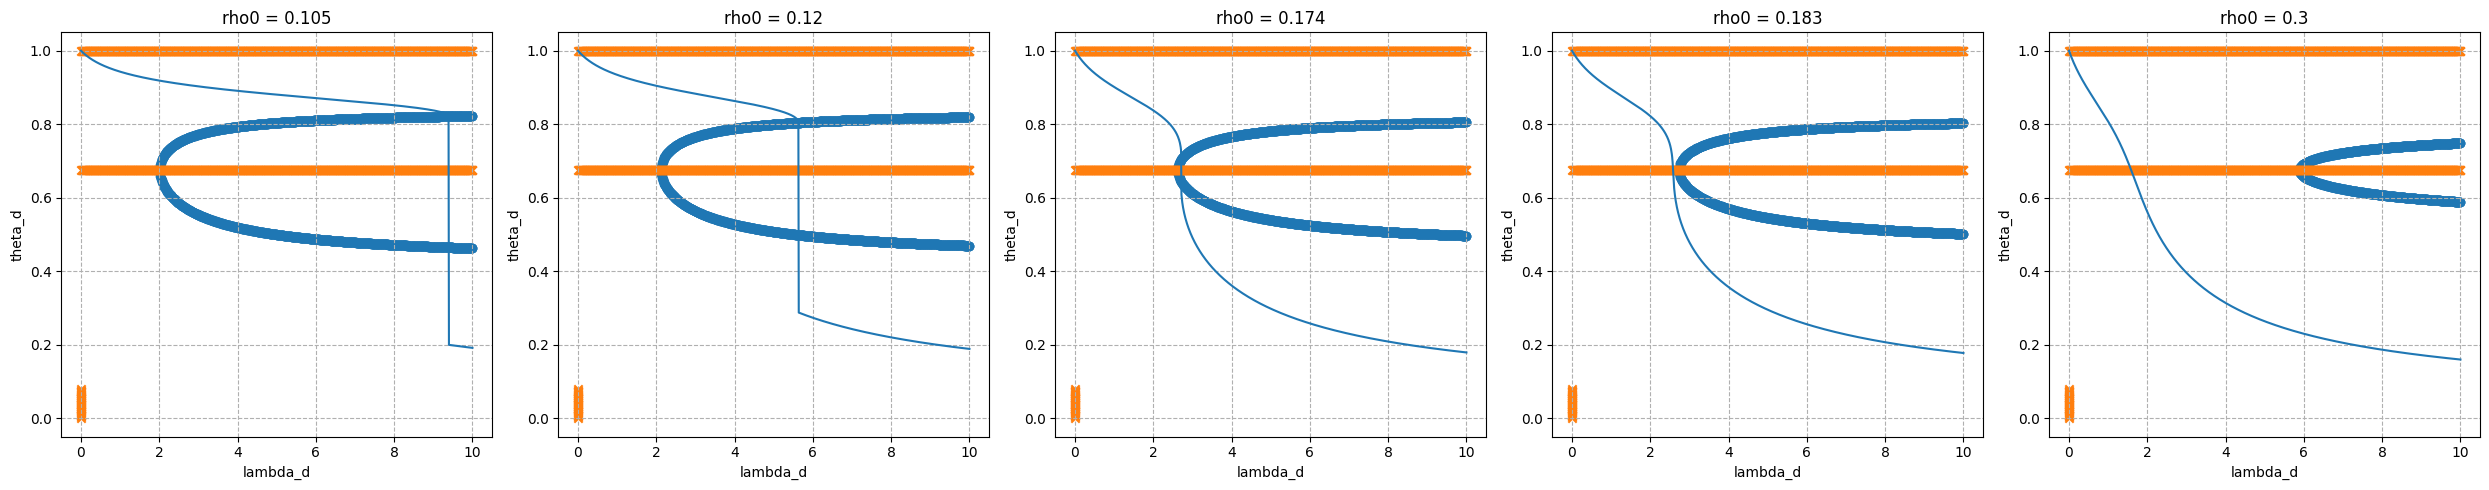

In [5]:
idx_list = [350, 400, 580, 610, 1000]
fig, ax = plt.subplots(1, len(idx_list), figsize=(5*len(idx_list), 5))
for idx, idx_val in enumerate(idx_list):
    ax[idx].plot(lambda_d_values, theta_d_infty[idx_val, :])
    ax[idx].scatter(gdp_x[idx_val], gdp_y[idx_val])
    ax[idx].scatter(gdpp_x[idx_val], gdpp_y[idx_val], marker="x")
    ax[idx].set_title(f"rho0 = {rho0_values[idx_val]}")
    ax[idx].set_xlabel("lambda_d")
    ax[idx].set_ylabel("theta_d")
    ax[idx].grid(linestyle='--')

plt.tight_layout()
plt.show()

In [6]:
lambda_c_horizontal = []
lambda_c_vertical = []

lambda_c2_horizontal = []
lambda_c2_vertical = []

for rho0_idx, rho0 in enumerate(tqdm(rho0_values)):
    arr1 = gd_gdp[gd_gdp["rho0"] == rho0]
    arr2 = gd_gdp_gdpp[gd_gdp_gdpp["rho0"] == rho0]
    for lambda_d_idx, lambda_d in enumerate(lambda_d_values):
        points1 = arr1[arr1["lambda_d"] == lambda_d]
        points2 = arr2[arr2["lambda_d"] == lambda_d]
        
        if(len(points1) > 0):
            lambda_c_horizontal.append(rho0)
            lambda_c_vertical.append(lambda_d)

        if(len(points2) > 0):
            lambda_c2_horizontal.append(rho0)
            lambda_c2_vertical.append(lambda_d)


100%|██████████| 1001/1001 [01:23<00:00, 11.96it/s]


In [11]:
# 固定パラメータ
k_out_min = 3
batch_size = 16
threshold = 3
mu = 1.0
network_type = "DirectedCMOutPow"

all_results = {}

output_path = configure_output_path(N, threshold, network_type, k_out_min)
print(f"output_path: {os.path.relpath(output_path)}")

df_all = pd.DataFrame()

for i in range(batch_size):
    index = f"{i:02d}"
    file_name = f'results_{index}.csv'
    file_path = os.path.join(output_path, file_name)
    
    df = pd.read_csv(file_path)
    if df is None:
        continue
    
    # バッチインデックスを調整（最初のバッチ以外、時系列データの場合のみ）
    if not df_all.empty and 'itr' in df.columns:
        max_itr = int(df_all['itr'].max())
        df['itr'] = df['itr'] + max_itr + 1
    
    df_all = pd.concat([df_all, df], ignore_index=True)

sim = df_all.set_index(['itr', 'rho_0', 'lambda_d', 'lambda_u', 'mu']).to_xarray()
initial_adopted_time = sim['initial_adopted_time']
final_adopted_time = sim['final_adopted_time']
sim_R = sim['R']
sim_Phi = sim['Phi']

output_path: ../app/out/fastsar/DirectedCMOutPow/threshold=3/N=10000/kOutMin=3


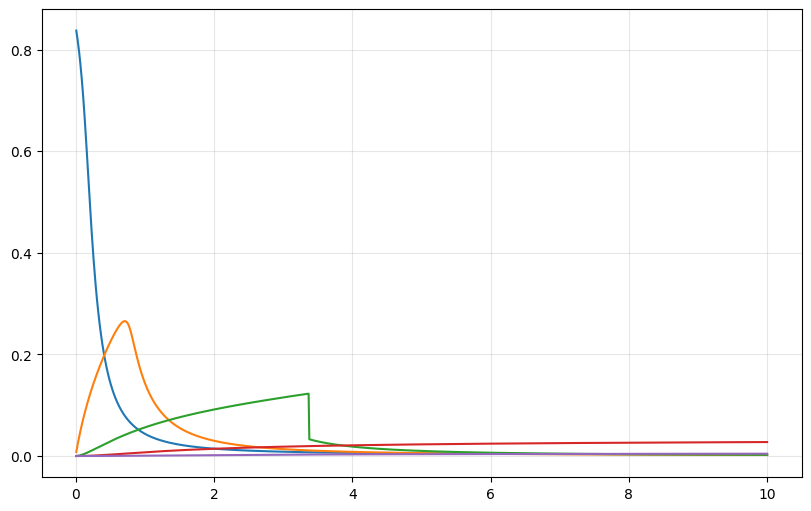

In [31]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5), constrained_layout=True)
color_idx = 1
show_rho0 = 0.15
p0=sim_Phi.sel(rho_0=show_rho0).squeeze().mean(dim='itr')/N
# p0.plot(linestyle="", marker="o", markersize=10, markeredgewidth=0.5, markeredgecolor=colors[color_idx], markerfacecolor="none")

p1 = g["Phi"].sel(rho0=0.15).squeeze()

for idx, T in enumerate(p1["T"].values):
    axes.plot(p1["lambda_d"][1:], p1.sel(T=T)[1:], linestyle="-", color=colors[idx])

axes.grid(linestyle="-", alpha=0.3)
plt.show()

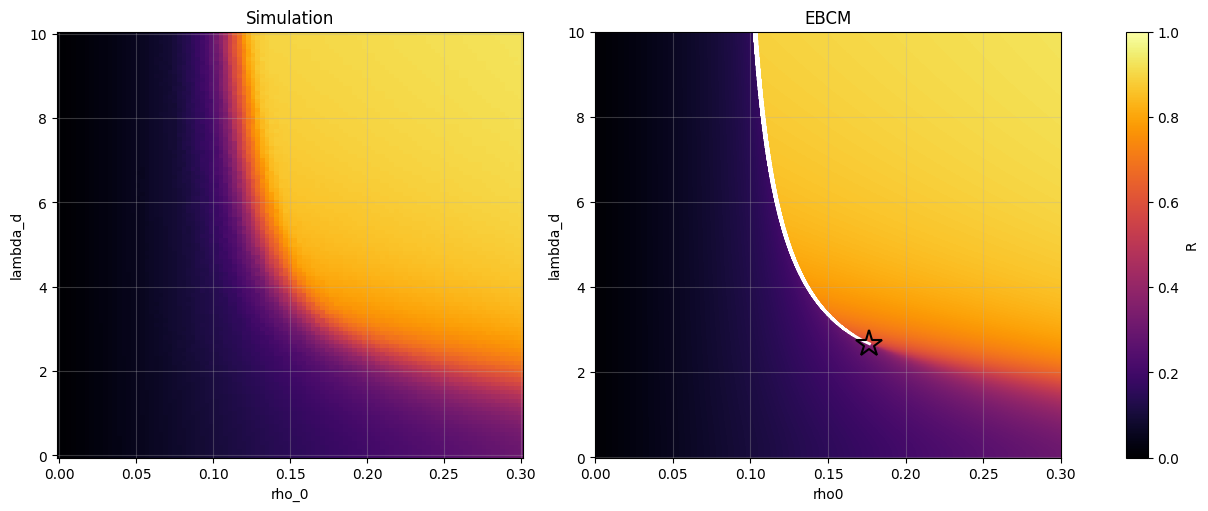

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)


p0=sim_R.squeeze().mean(dim='itr').T/N
p0.plot(
    ax=axes[0],
    cmap="inferno",
    vmin=0.0,
    vmax=1.0,
    add_colorbar=False
)

axes[0].grid(linestyle="-", alpha=0.3)
axes[0].set_title("Simulation")

p1=g["R"].T.plot(
    ax=axes[1],
    cmap="inferno",
    vmin=0.0,
    vmax=1.0,
    add_colorbar=False
)

axes[1].plot(lambda_c_horizontal, lambda_c_vertical,
             linestyle="-", color="w", linewidth=2.0)

axes[1].plot(lambda_c2_horizontal, lambda_c2_vertical,
             linestyle="", marker="*", markersize=20,
             markerfacecolor="none", markeredgecolor="black",
             markeredgewidth=1.5)

axes[1].grid(linestyle="-", alpha=0.3)
axes[1].set_title("EBCM")

fig.colorbar(p1, ax=axes, label="R")
plt.show()
